In [54]:
%pylab inline
pylab.rcParams['figure.figsize'] = (24, 14)
import numpy as np
import imageio

Populating the interactive namespace from numpy and matplotlib


In [51]:
Probe = imageio.imread('./1_relighting/rnl_probe.hdr')

Directions = np.loadtxt('./3_knight/light_directions.txt')
Intensities = np.loadtxt('./3_knight/light_intensities.txt')

PhotoNumbers = Directions[:, 0]
Directions = Directions[:, 1:]
Intensities = Intensities[:, 1:]

KnightImgs = []
for Number in PhotoNumbers:
    fName = './3_knight/knight_fighting_%03d.png' % int(Number)
    KnightImgs.append((imageio.imread(fName) / 255.0) ** 2.2)

In [52]:
def computeDColors(Probe, D, I):
    Dx = D[:, 0]
    Dy = D[:, 1]
    Dz = D[:, 2]
    
    r = (1 / np.pi) * np.arccos(Dz) / np.sqrt(Dx ** 2 + Dy ** 2)
    U = Dx * r
    V = Dy * r
    
    Ux = ((U + 1) * 0.5 * Probe.shape[0])
    Uy = ((U + 1) * 0.5 * Probe.shape[1])
    
    return map(lambda (i, coord): Probe[coord[0], coord[1]] * I[i], enumerate(np.hstack([Ux[:, None], Uy[:, None]])))

def lightModel(Images, ProbeColors):
    coloredImages = []
    for i, Image in enumerate(Images):
        coloredImages.append(Image * ProbeColors[i])
        
    return np.sum(np.array(coloredImages), axis=0)

Colors = computeDColors(Probe, Directions, Intensities)
LightedKnight = lightModel(KnightImgs, Colors)

/Users/Killavus/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:13: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


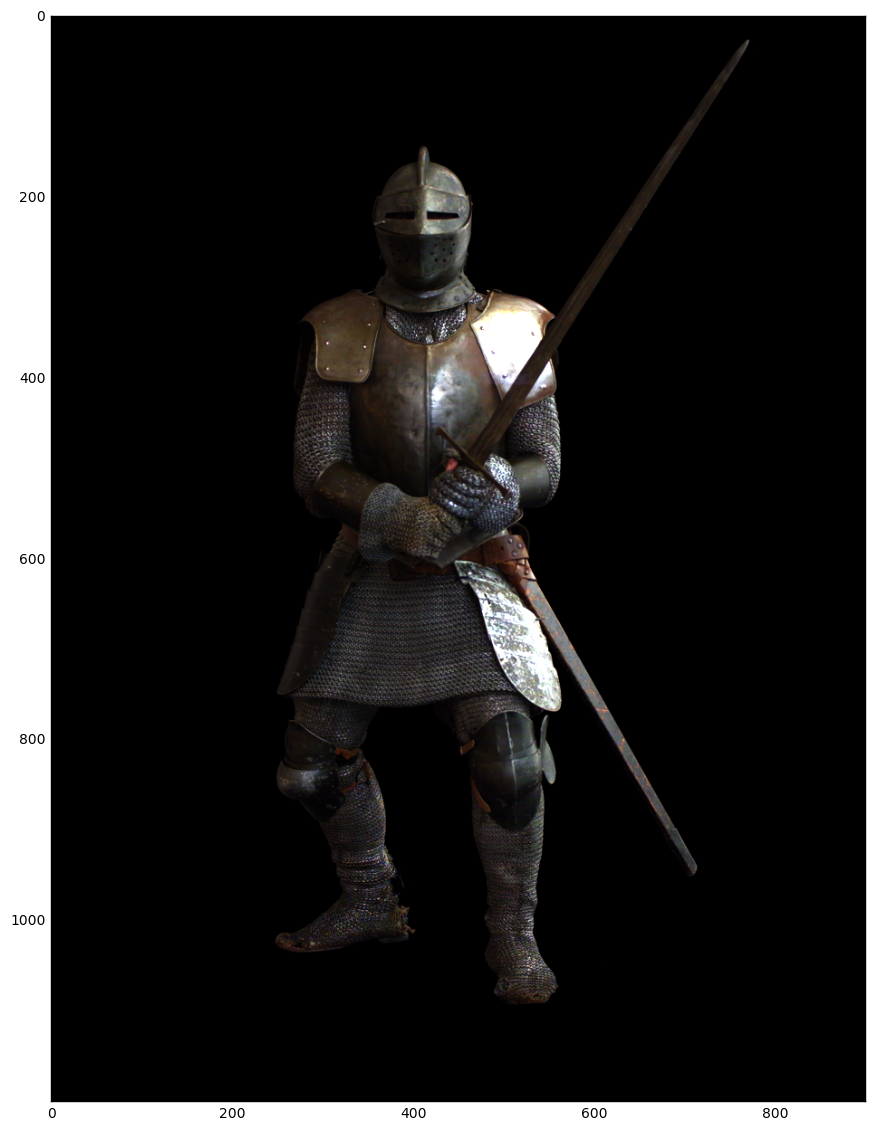

In [55]:
imshow(np.clip(LightedKnight / 5, 0, 1))

In [56]:
# Create a movie from the rotated probe:

import scipy.ndimage

RotationStep = 15.0
Rotations = np.arange(0.0, 360.0, RotationStep)

VideoWriter = imageio.get_writer('./knight.mp4', fps=8)

for Rotation in Rotations:
    RotatedProbe = scipy.ndimage.rotate(Probe, Rotation, reshape=False)
    Colors = computeDColors(RotatedProbe, Directions, Intensities)
    KnightFrame = lightModel(KnightImgs, Colors)
    print 'Rendered frame'
    
    VideoWriter.append_data(np.clip(KnightFrame / 5, 0, 1))

/Users/Killavus/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:13: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


Rendered frame


Rendered frame
Rendered frame
Rendered frame
Rendered frame
Rendered frame
Rendered frame
Rendered frame
Rendered frame
Rendered frame
Rendered frame
Rendered frame
Rendered frame
Rendered frame
Rendered frame
Rendered frame
Rendered frame
Rendered frame
Rendered frame
Rendered frame
Rendered frame
Rendered frame
Rendered frame
Rendered frame


In [57]:
VideoWriter.close()